In [1275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

pd.set_option('display.max_columns', None)
p2425 = pd.read_csv("./data/season-2425.csv")
p2324 = pd.read_csv("./data/season-2324.csv")
p2223 = pd.read_csv("./data/season-2223.csv")
p2122 = pd.read_csv("./data/season-2122.csv")
p2021 = pd.read_csv("./data/season-2021.csv")
p1920 = pd.read_csv("./data/season-1920.csv")
p1819 = pd.read_csv("./data/season-1819.csv")
p1718 = pd.read_csv("./data/season-1718.csv")
p1617 = pd.read_csv("./data/season-1617.csv")
p1516 = pd.read_csv("./data/season-1516.csv")
p1415 = pd.read_csv("./data/season-1415.csv")

Prem_DF = pd.concat([p2425, p2324, p2223, p2122, p2021, p1920, p1819, p1718, p1617, p1516, p1415])
Prem_DF.reset_index(inplace=True)

In [1276]:
# HomeTeam -> string --> Home Team
# AwayTeam -> string --> Away Team
# FTHG -> integer --> Full Time Home Team Goals
# FTAG -> integer --> Full Time Away Team Goals
# FTR -> string --> Full Time Result (H=Home Win, D=Draw, A=Away Win)
# HTHG -> integer --> Half Time Home Team Goals
# HTAG -> integer --> Half Time Away Team Goals
# HTR -> string --> Half Time Result (H=Home Win, D=Draw, A=Away Win)
# Referee -> string --> Match Referee
# HS -> integer --> Home Team Shots
# AS -> integer --> Away Team Shots
# HST -> integer --> Home Team Shots on Target
# AST -> integer --> Away Team Shots on Target
# HF -> integer --> Home Team Fouls Committed
# AF -> integer --> Away Team Fouls Committed
# HC -> integer --> Home Team Corners
# AC -> integer --> Away Team Corners
# HY -> integer --> Home Team Yellow Cards
# AY -> integer --> Away Team Yellow Cards
# HR -> integer --> Home Team Red Cards
# AR -> integer --> Away Team Red Cards


In [1277]:
Prem_DF


,index,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,16/08/24,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,1,17/08/24,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2,17/08/24,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,3,17/08/24,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,4,17/08/24,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,375,24/05/15,Hull,Man United,0,0,D,0,0,D,L Probert,16,7,6,1,12,15,8,1,2,2,0,1
4025,376,24/05/15,Leicester,QPR,5,1,H,2,0,H,M Oliver,22,18,7,2,7,6,5,6,0,0,0,0
4026,377,24/05/15,Man City,Southampton,2,0,H,1,0,H,C Foy,15,13,6,4,13,8,8,4,1,1,0,0
4027,378,24/05/15,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,17,4,4,1,9,9,2,3,2,1,0,0


In [1278]:
# DATA CLEANING:
# Setting up the DataFrame so it is more suitable for answering my questions, checking for na values and duplicates as well as reformating some columns

In [1279]:
Prem_DF.drop(columns="index", inplace=True)

In [1280]:
Prem_DF

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/24,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,17/08/24,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,17/08/24,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,17/08/24,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,17/08/24,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,24/05/15,Hull,Man United,0,0,D,0,0,D,L Probert,16,7,6,1,12,15,8,1,2,2,0,1
4025,24/05/15,Leicester,QPR,5,1,H,2,0,H,M Oliver,22,18,7,2,7,6,5,6,0,0,0,0
4026,24/05/15,Man City,Southampton,2,0,H,1,0,H,C Foy,15,13,6,4,13,8,8,4,1,1,0,0
4027,24/05/15,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,17,4,4,1,9,9,2,3,2,1,0,0


In [1281]:
Prem_DF.isna().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [1282]:
Prem_DF.drop_duplicates()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/24,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,17/08/24,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,17/08/24,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,17/08/24,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,17/08/24,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,24/05/15,Hull,Man United,0,0,D,0,0,D,L Probert,16,7,6,1,12,15,8,1,2,2,0,1
4025,24/05/15,Leicester,QPR,5,1,H,2,0,H,M Oliver,22,18,7,2,7,6,5,6,0,0,0,0
4026,24/05/15,Man City,Southampton,2,0,H,1,0,H,C Foy,15,13,6,4,13,8,8,4,1,1,0,0
4027,24/05/15,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,17,4,4,1,9,9,2,3,2,1,0,0


In [1283]:
Prem_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4029 entries, 0 to 4028
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4029 non-null   object
 1   HomeTeam  4029 non-null   object
 2   AwayTeam  4029 non-null   object
 3   FTHG      4029 non-null   int64 
 4   FTAG      4029 non-null   int64 
 5   FTR       4029 non-null   object
 6   HTHG      4029 non-null   int64 
 7   HTAG      4029 non-null   int64 
 8   HTR       4029 non-null   object
 9   Referee   4029 non-null   object
 10  HS        4029 non-null   int64 
 11  AS        4029 non-null   int64 
 12  HST       4029 non-null   int64 
 13  AST       4029 non-null   int64 
 14  HF        4029 non-null   int64 
 15  AF        4029 non-null   int64 
 16  HC        4029 non-null   int64 
 17  AC        4029 non-null   int64 
 18  HY        4029 non-null   int64 
 19  AY        4029 non-null   int64 
 20  HR        4029 non-null   int64 
 21  AR        4029

In [1284]:
Prem_DF.rename(columns={"Date": "date", "HomeTeam": "home", "AwayTeam": "away", "FTHG": "fthg", "FTAG": "ftag", "FTR": "ftr", "HTHG": "hthg", "HTAG": "htag", "HTR": "htr", "Referee": "referee", 
                        "HS": "hs", "AS": "as", "HST": "hst", "AST": "ast", "HF": "hf", "AF": "af", "HC": "hc", "AC": "ac", "HY": "hy", "AY": "ay", "HR": "hr", "AR": "ar"}, inplace=True)

In [1285]:
# I forgot the 'inplace=True' and so the rename wasn't working properly, I included the line and then used the print statement below to check renaming happened in the intended way.

In [1286]:
print(Prem_DF.columns)

Index(['date', 'home', 'away', 'fthg', 'ftag', 'ftr', 'hthg', 'htag', 'htr',
       'referee', 'hs', 'as', 'hst', 'ast', 'hf', 'af', 'hc', 'ac', 'hy', 'ay',
       'hr', 'ar'],
      dtype='object')


In [1287]:
Prem_DF["date"] = pd.to_datetime(Prem_DF["date"])
Prem_DF

C:\Users\tango\AppData\Local\Temp\ipykernel_1812\141959832.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Prem_DF["date"] = pd.to_datetime(Prem_DF["date"])


,date,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024-08-16,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024-08-17,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024-08-17,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024-08-17,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024-08-17,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2015-05-24,Hull,Man United,0,0,D,0,0,D,L Probert,16,7,6,1,12,15,8,1,2,2,0,1
4025,2015-05-24,Leicester,QPR,5,1,H,2,0,H,M Oliver,22,18,7,2,7,6,5,6,0,0,0,0
4026,2015-05-24,Man City,Southampton,2,0,H,1,0,H,C Foy,15,13,6,4,13,8,8,4,1,1,0,0
4027,2015-05-24,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,17,4,4,1,9,9,2,3,2,1,0,0


In [1288]:
Prem_DF.insert(1, "year", Prem_DF["date"].dt.year)
Prem_DF

,date,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024-08-16,2024,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024-08-17,2024,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024-08-17,2024,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024-08-17,2024,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024-08-17,2024,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2015-05-24,2015,Hull,Man United,0,0,D,0,0,D,L Probert,16,7,6,1,12,15,8,1,2,2,0,1
4025,2015-05-24,2015,Leicester,QPR,5,1,H,2,0,H,M Oliver,22,18,7,2,7,6,5,6,0,0,0,0
4026,2015-05-24,2015,Man City,Southampton,2,0,H,1,0,H,C Foy,15,13,6,4,13,8,8,4,1,1,0,0
4027,2015-05-24,2015,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,17,4,4,1,9,9,2,3,2,1,0,0


In [1289]:
Prem_DF["year"].max()

np.int32(2025)

In [1290]:
# Making a new 'year' column where the date was, I don't need the full date for my analysis as I am simply interested in the statistics by year.

In [1291]:
Prem_DF.drop(columns="date", inplace=True)
Prem_DF

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2015,Hull,Man United,0,0,D,0,0,D,L Probert,16,7,6,1,12,15,8,1,2,2,0,1
4025,2015,Leicester,QPR,5,1,H,2,0,H,M Oliver,22,18,7,2,7,6,5,6,0,0,0,0
4026,2015,Man City,Southampton,2,0,H,1,0,H,C Foy,15,13,6,4,13,8,8,4,1,1,0,0
4027,2015,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,17,4,4,1,9,9,2,3,2,1,0,0


In [1292]:
Prem_DF = Prem_DF.sort_values(by="year", ascending=False)
Prem_DF.reset_index(inplace=True)

In [1293]:
Prem_DF.drop(columns="index", inplace=True)

In [1294]:
Prem_DF

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2025,Ipswich,Man City,0,6,A,0,3,A,S Barrott,8,17,4,9,4,7,4,7,0,1,0,0
1,2025,Chelsea,Wolves,3,1,H,1,1,D,S Hooper,19,9,7,4,8,14,3,6,4,2,0,0
2,2025,Bournemouth,Nott'm Forest,5,0,H,1,0,H,C Pawson,16,18,10,4,9,12,3,9,2,3,0,0
3,2025,Brighton,Everton,0,1,A,0,1,A,T Robinson,16,3,1,1,8,11,9,1,3,4,0,0
4,2025,Liverpool,Ipswich,4,1,H,3,0,H,M Salisbury,16,3,6,3,10,11,3,4,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2014,Liverpool,Southampton,2,1,H,1,0,H,M Clattenburg,12,12,5,6,8,11,2,6,1,2,0,0
4025,2014,Newcastle,Man City,0,2,A,0,1,A,M Atkinson,12,13,0,5,8,11,3,3,1,5,0,0
4026,2014,Burnley,Chelsea,1,3,A,1,3,A,M Oliver,9,11,2,3,6,7,4,3,1,1,0,0
4027,2014,Aston Villa,Newcastle,0,0,D,0,0,D,M Dean,9,11,0,4,11,8,7,7,4,0,0,1


In [1295]:
# Creating a copy of the main DF in the event later on in the project I want to experiment with exploration and end up doing accidental collateral.

In [1296]:
Prem_DF_Copy = Prem_DF

In [1297]:
Prem_DF_Copy

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2025,Ipswich,Man City,0,6,A,0,3,A,S Barrott,8,17,4,9,4,7,4,7,0,1,0,0
1,2025,Chelsea,Wolves,3,1,H,1,1,D,S Hooper,19,9,7,4,8,14,3,6,4,2,0,0
2,2025,Bournemouth,Nott'm Forest,5,0,H,1,0,H,C Pawson,16,18,10,4,9,12,3,9,2,3,0,0
3,2025,Brighton,Everton,0,1,A,0,1,A,T Robinson,16,3,1,1,8,11,9,1,3,4,0,0
4,2025,Liverpool,Ipswich,4,1,H,3,0,H,M Salisbury,16,3,6,3,10,11,3,4,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2014,Liverpool,Southampton,2,1,H,1,0,H,M Clattenburg,12,12,5,6,8,11,2,6,1,2,0,0
4025,2014,Newcastle,Man City,0,2,A,0,1,A,M Atkinson,12,13,0,5,8,11,3,3,1,5,0,0
4026,2014,Burnley,Chelsea,1,3,A,1,3,A,M Oliver,9,11,2,3,6,7,4,3,1,1,0,0
4027,2014,Aston Villa,Newcastle,0,0,D,0,0,D,M Dean,9,11,0,4,11,8,7,7,4,0,0,1


In [1298]:
# Question 1: *Which team has scored the most goals in the past decade?*
# Variables to focus on: 'year', 'home', 'away', 'fthg', 'ftag'

In [1299]:
def cycleTeam(year, team):
    TeamYear_DF = Prem_DF.loc[(Prem_DF["year"] == year) & (Prem_DF["home"] == team) + (Prem_DF["away"] == team)]
    return TeamYear_DF

cycleTeam(2017, "Arsenal")


,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
2685,2017,Stoke,Arsenal,1,4,A,0,1,A,M Dean,10,10,4,6,13,7,7,6,1,2,0,0
2697,2017,Tottenham,Arsenal,2,0,H,0,0,D,M Oliver,20,12,11,4,7,15,14,5,1,3,0,0
2701,2017,Arsenal,Everton,3,1,H,2,0,H,M Oliver,17,22,9,7,10,15,4,6,2,4,1,0
2710,2017,Crystal Palace,Arsenal,2,3,A,0,1,A,M Oliver,16,16,2,9,12,7,5,4,0,1,0,0
2720,2017,West Ham,Arsenal,0,0,D,0,0,D,J Moss,6,22,0,3,9,9,1,7,1,0,0,0
2729,2017,Arsenal,Liverpool,3,3,D,0,1,A,M Atkinson,11,14,4,9,9,11,7,8,1,0,0,0
2733,2017,West Brom,Arsenal,1,1,D,0,0,D,M Dean,14,14,3,4,14,9,5,6,3,3,0,0
2751,2017,Arsenal,Newcastle,1,0,H,1,0,H,S Attwell,23,10,5,2,13,9,7,5,2,1,0,0
2755,2017,Arsenal,Huddersfield,5,0,H,1,0,H,G Scott,21,7,7,2,10,12,7,2,0,1,0,0
2762,2017,Southampton,Arsenal,1,1,D,1,0,H,R Madley,6,11,3,6,12,10,4,5,2,2,0,0


In [1300]:
totalHomeGoals = cycleTeam(2017, "Arsenal")[cycleTeam(2017, "Arsenal")["home"] == "Arsenal"]["fthg"].sum()
totalAwayGoals = cycleTeam(2017, "Arsenal")[cycleTeam(2017, "Arsenal")["away"] == "Arsenal"]["ftag"].sum()
totalGoals = totalHomeGoals + totalAwayGoals

Arsenal2017 = {
    "Home_Goals": int(totalHomeGoals),
    "Away_Goals": int(totalAwayGoals),
    "Total_Goals": int(totalGoals)
}
print(Arsenal2017)

{'Home_Goals': 45, 'Away_Goals': 31, 'Total_Goals': 76}


In [1301]:
# Combining the CycleTeam functions and creating a new one 'findTotalGoals' so we can just input a year and team to find the total goals for that year!

In [1302]:
def cycleTeam(year, team):
    TeamYear_DF = Prem_DF.loc[(Prem_DF["year"] == year) & (Prem_DF["home"] == team) + (Prem_DF["away"] == team)]
    return TeamYear_DF

def findTotalGoals(year, team):
    totalHomeGoals = cycleTeam(year, team)[cycleTeam(year, team)["home"] == team]["fthg"].sum()
    totalAwayGoals = cycleTeam(year, team)[cycleTeam(year, team)["away"] == team]["ftag"].sum()
    totalGoals = totalHomeGoals + totalAwayGoals
    objectName = f"{team}{year}"

    # objectName = {
    #     "Year": year,
    #     "Team": team,
    #     "Home_Goals": int(totalHomeGoals),
    #     "Away_Goals": int(totalAwayGoals),
    #     "Total_Goals": int(totalGoals)
    # }
    return (team, year, int(totalHomeGoals), int(totalAwayGoals), int(totalGoals))

findTotalGoals(2014, "Arsenal")

('Arsenal', 2014, 18, 16, 34)

In [1303]:
teams_list = set()
years_list = set()
for index, entry in Prem_DF.iterrows():
    teams_list.add(entry["home"])
    years_list.add(entry["year"])

teams_list = sorted(teams_list)
years_list = sorted(years_list)

print(years_list)

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [1304]:
# Now having both a list of all the years and all the teams that played across the decade, I should, in theory be able to cycle these values and input them
# into my shiny new 'findTotalGoals' function!

In [1305]:
Goal_Counts = []
def findGoalCounts():
    for year in years_list:
        for team in teams_list:
            Goal_Counts.append(findTotalGoals(year, team))
    return Goal_Counts

tg_by_year = pd.DataFrame(findGoalCounts())
tg_by_year.rename(columns = {0: "Team", 1: "Year", 2: "Total_HG", 3: "Total_AG", 4: "Total_Goals"}, inplace=True)

In [1306]:
tg_by_year

,Team,Year,Total_HG,Total_AG,Total_Goals
0,Arsenal,2014,18,16,34
1,Aston Villa,2014,7,4,11
2,Bournemouth,2014,0,0,0
3,Brentford,2014,0,0,0
4,Brighton,2014,0,0,0
...,...,...,...,...,...
415,Tottenham,2025,2,3,5
416,Watford,2025,0,0,0
417,West Brom,2025,0,0,0
418,West Ham,2025,3,2,5


In [1307]:
tg_by_year[tg_by_year["Team"] == "Arsenal"]["Total_Goals"].sum()

np.int64(755)

In [1308]:
tg_by_decade = []
for team in teams_list:
    tg_by_decade.append({
        "Team": team, 
        "Total_Goals": int(tg_by_year[tg_by_year["Team"] == team]["Total_Goals"].sum())
        })

tg_by_decade


[{'Team': 'Arsenal', 'Total_Goals': 755},
 {'Team': 'Aston Villa', 'Total_Goals': 367},
 {'Team': 'Bournemouth', 'Total_Goals': 373},
 {'Team': 'Brentford', 'Total_Goals': 204},
 {'Team': 'Brighton', 'Total_Goals': 352},
 {'Team': 'Burnley', 'Total_Goals': 299},
 {'Team': 'Cardiff', 'Total_Goals': 34},
 {'Team': 'Chelsea', 'Total_Goals': 705},
 {'Team': 'Crystal Palace', 'Total_Goals': 477},
 {'Team': 'Everton', 'Total_Goals': 494},
 {'Team': 'Fulham', 'Total_Goals': 205},
 {'Team': 'Huddersfield', 'Total_Goals': 50},
 {'Team': 'Hull', 'Total_Goals': 70},
 {'Team': 'Ipswich', 'Total_Goals': 21},
 {'Team': 'Leeds', 'Total_Goals': 152},
 {'Team': 'Leicester', 'Total_Goals': 542},
 {'Team': 'Liverpool', 'Total_Goals': 828},
 {'Team': 'Luton', 'Total_Goals': 52},
 {'Team': 'Man City', 'Total_Goals': 956},
 {'Team': 'Man United', 'Total_Goals': 637},
 {'Team': 'Middlesbrough', 'Total_Goals': 27},
 {'Team': 'Newcastle', 'Total_Goals': 487},
 {'Team': 'Norwich', 'Total_Goals': 88},
 {'Team': 

In [1309]:
Question_One = pd.DataFrame(tg_by_decade)
Question_One

,Team,Total_Goals
0,Arsenal,755
1,Aston Villa,367
2,Bournemouth,373
3,Brentford,204
4,Brighton,352
5,Burnley,299
6,Cardiff,34
7,Chelsea,705
8,Crystal Palace,477
9,Everton,494


In [1310]:
Question_One["Total_Goals"].max()
Question_One["Total_Goals"].idxmax()
Question_One.iloc[18]
print(f"The highest scoring team in the last decade [2014-2025] is {Question_One.iloc[18]["Team"]} with a grand total of: {Question_One["Total_Goals"].max()} goals scored!")

The highest scoring team in the last decade [2014-2025] is Man City with a grand total of: 956 goals scored!


In [1311]:
Question_One = Question_One.sort_values(by="Total_Goals", ascending=False)

In [1312]:
Question_One.reset_index(drop=True, inplace=True)

In [1313]:
Question_One

,Team,Total_Goals
0,Man City,956
1,Liverpool,828
2,Arsenal,755
3,Tottenham,742
4,Chelsea,705
5,Man United,637
6,West Ham,557
7,Leicester,542
8,Everton,494
9,Newcastle,487


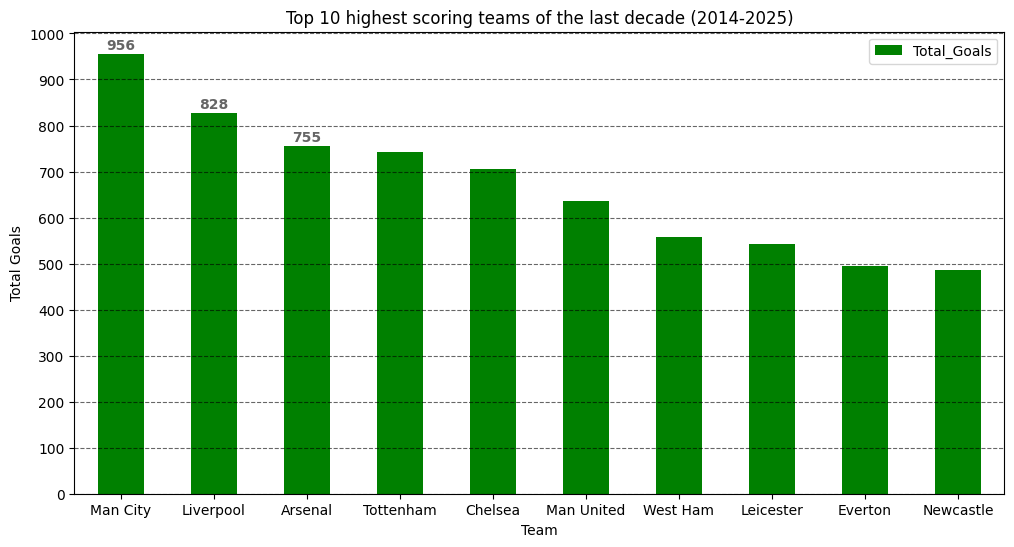

In [1314]:
Question_One_Top10 = Question_One.head(10)
Top_10 = Question_One_Top10.plot(x="Team", y="Total_Goals", kind="bar", color="green", figsize=(12,6))

plt.xticks(rotation=0)
plt.yticks(range(0, Question_One_Top10["Total_Goals"].max() + 100, 100))
plt.xlabel("Team")
plt.ylabel("Total Goals")
plt.title("Top 10 highest scoring teams of the last decade (2014-2025)")
plt.grid(axis="y", linestyle="--", color="black", alpha=0.6)

for i, value in enumerate(Question_One_Top10["Total_Goals"]):
    if i < 3:
        plt.text(i, value + 10, str(value), ha="center", fontsize=10, fontweight="bold", color="black", alpha=0.6)
plt.show()

In [1315]:
Prem_DF.head()

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2025,Ipswich,Man City,0,6,A,0,3,A,S Barrott,8,17,4,9,4,7,4,7,0,1,0,0
1,2025,Chelsea,Wolves,3,1,H,1,1,D,S Hooper,19,9,7,4,8,14,3,6,4,2,0,0
2,2025,Bournemouth,Nott'm Forest,5,0,H,1,0,H,C Pawson,16,18,10,4,9,12,3,9,2,3,0,0
3,2025,Brighton,Everton,0,1,A,0,1,A,T Robinson,16,3,1,1,8,11,9,1,3,4,0,0
4,2025,Liverpool,Ipswich,4,1,H,3,0,H,M Salisbury,16,3,6,3,10,11,3,4,0,2,0,0


In [1316]:
# Question 2:
# Which team(s) in the past decade, win most of their games at home and which team(s) win most of their games away?
# Looking at total % of wins that are at home/away
# Likely using a pie chart to depict this, total wins - home% / away%
# Variables to focus on: year, home, away, ftr

In [1317]:
Home_Winners = Prem_DF[Prem_DF["ftr"] == "H"]["home"]
Away_Winners = Prem_DF[Prem_DF["ftr"] == "A"]["away"]

Home_Winners.reset_index(drop=True, inplace=True)
Away_Winners.reset_index(drop=True, inplace=True)

# print(int(Home_Winners.value_counts()["Arsenal"]), int(Away_Winners.value_counts()["Arsenal"]))

total_wins = []
def totalWins():
    for team in teams_list:
        total_wins.append(
            {
                "Team": team,
                "Home_Wins": int(Home_Winners.value_counts()[team]),
                "Away_Wins": int(Away_Winners.value_counts()[team]),
                "Total_Wins": int(Home_Winners.value_counts()[team] + Away_Winners.value_counts()[team])
            }
        )
    return (total_wins)
print(totalWins())


[{'Team': 'Arsenal', 'Home_Wins': 134, 'Away_Wins': 92, 'Total_Wins': 226}, {'Team': 'Aston Villa', 'Home_Wins': 57, 'Away_Wins': 42, 'Total_Wins': 99}, {'Team': 'Bournemouth', 'Home_Wins': 53, 'Away_Wins': 38, 'Total_Wins': 91}, {'Team': 'Brentford', 'Home_Wins': 29, 'Away_Wins': 18, 'Total_Wins': 47}, {'Team': 'Brighton', 'Home_Wins': 48, 'Away_Wins': 38, 'Total_Wins': 86}, {'Team': 'Burnley', 'Home_Wins': 47, 'Away_Wins': 33, 'Total_Wins': 80}, {'Team': 'Cardiff', 'Home_Wins': 6, 'Away_Wins': 4, 'Total_Wins': 10}, {'Team': 'Chelsea', 'Home_Wins': 111, 'Away_Wins': 99, 'Total_Wins': 210}, {'Team': 'Crystal Palace', 'Home_Wins': 66, 'Away_Wins': 59, 'Total_Wins': 125}, {'Team': 'Everton', 'Home_Wins': 86, 'Away_Wins': 49, 'Total_Wins': 135}, {'Team': 'Fulham', 'Home_Wins': 29, 'Away_Wins': 19, 'Total_Wins': 48}, {'Team': 'Huddersfield', 'Home_Wins': 8, 'Away_Wins': 4, 'Total_Wins': 12}, {'Team': 'Hull', 'Home_Wins': 13, 'Away_Wins': 4, 'Total_Wins': 17}, {'Team': 'Ipswich', 'Home_Wins

In [1318]:
Question_Two = pd.DataFrame(total_wins)
Question_Two

,Team,Home_Wins,Away_Wins,Total_Wins
0,Arsenal,134,92,226
1,Aston Villa,57,42,99
2,Bournemouth,53,38,91
3,Brentford,29,18,47
4,Brighton,48,38,86
5,Burnley,47,33,80
6,Cardiff,6,4,10
7,Chelsea,111,99,210
8,Crystal Palace,66,59,125
9,Everton,86,49,135


In [1319]:
Question_Two["HomeWin%"] = round((Question_Two["Home_Wins"] / Question_Two["Total_Wins"]), 3) * 100
Question_Two["AwayWin%"] = round((Question_Two["Away_Wins"] / Question_Two["Total_Wins"]), 3) * 100

In [1320]:
# Question_Two.drop(columns={"Home%", "Away%"}, inplace=True)

In [1321]:
Question_Two.sort_values(by="HomeWin%", ascending=False)

,Team,Home_Wins,Away_Wins,Total_Wins,HomeWin%,AwayWin%
20,Middlesbrough,4,1,5,80.0,20.0
12,Hull,13,4,17,76.5,23.5
24,QPR,6,2,8,75.0,25.0
25,Sheffield United,17,7,24,70.8,29.2
22,Norwich,13,6,19,68.4,31.6
17,Luton,4,2,6,66.7,33.3
11,Huddersfield,8,4,12,66.7,33.3
29,Swansea,31,17,48,64.6,35.4
27,Stoke,30,17,47,63.8,36.2
9,Everton,86,49,135,63.7,36.3


In [1322]:
Prem_DF[Prem_DF["home"] == "Middlesbrough"]

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
2688,2017,Middlesbrough,Southampton,1,2,A,0,1,A,A Taylor,14,14,3,4,19,11,6,3,3,0,0,0
2698,2017,Middlesbrough,Man City,2,2,D,1,0,H,K Friend,14,22,6,4,9,9,4,11,4,4,0,0
2941,2017,Middlesbrough,Sunderland,1,0,H,1,0,H,M Dean,6,10,2,4,15,11,3,5,3,3,0,0
2951,2017,Middlesbrough,Arsenal,1,2,A,0,1,A,A Taylor,13,12,5,4,11,16,2,4,2,2,0,0
2968,2017,Middlesbrough,Burnley,0,0,D,0,0,D,M Atkinson,12,7,5,2,9,12,4,3,0,3,0,0
2992,2017,Middlesbrough,Man United,1,3,A,0,1,A,J Moss,10,14,3,6,9,8,8,3,1,1,0,0
3027,2017,Middlesbrough,West Ham,1,3,A,1,2,A,M Atkinson,11,13,2,5,7,14,7,5,2,1,0,0
3030,2017,Middlesbrough,Everton,0,0,D,0,0,D,M Dean,9,7,3,3,14,9,5,2,2,0,0,0
3049,2017,Middlesbrough,West Brom,1,1,D,1,1,D,S Attwell,11,16,3,5,12,13,4,2,2,1,0,0
3071,2017,Middlesbrough,Leicester,0,0,D,0,0,D,R Madley,9,10,1,4,10,9,2,2,3,0,0,0


In [1323]:
# Well.. this is awkward, according to the analysis Middlesbrough have a tremendous win rate of 80% at home! What an incredible team!!!
# Or it would be... if the sample size wasn't so small. To make it a bit more accurate, we'll take into account
# 'draws' and total games!

In [1324]:
Home_Winners = Prem_DF[Prem_DF["ftr"] == "H"]["home"]
Draw_Games_Home = Prem_DF[Prem_DF["ftr"] == "D"]["home"]
Draw_Games_Away = Prem_DF[Prem_DF["ftr"] == "D"]["away"]
Away_Winners = Prem_DF[Prem_DF["ftr"] == "A"]["away"]

Home_Winners.reset_index(drop=True, inplace=True)
Away_Winners.reset_index(drop=True, inplace=True)

total_wins = []
def totalWins():
    for team in teams_list:
        Home_Team = Prem_DF[Prem_DF["home"] == team]["home"]
        Away_Team = Prem_DF[Prem_DF["away"] == team]["away"]
        total_wins.append(
            {
                "Team": team,
                "Home_Wins": int(Home_Winners.value_counts()[team]),
                "Draws": int(Draw_Games_Home.value_counts()[team] + Draw_Games_Away.value_counts()[team]),
                "Away_Wins": int(Away_Winners.value_counts()[team]),
                "Total_Wins": int(Home_Winners.value_counts()[team] + Away_Winners.value_counts()[team]),
                "Total_Games": int(Home_Team.value_counts()[team] + Away_Team.value_counts()[team])
            }
        )
    return (total_wins)

print(totalWins())

[{'Team': 'Arsenal', 'Home_Wins': 134, 'Draws': 82, 'Away_Wins': 92, 'Total_Wins': 226, 'Total_Games': 403}, {'Team': 'Aston Villa', 'Home_Wins': 57, 'Draws': 59, 'Away_Wins': 42, 'Total_Wins': 99, 'Total_Games': 289}, {'Team': 'Bournemouth', 'Home_Wins': 53, 'Draws': 65, 'Away_Wins': 38, 'Total_Wins': 91, 'Total_Games': 289}, {'Team': 'Brentford', 'Home_Wins': 29, 'Draws': 34, 'Away_Wins': 18, 'Total_Wins': 47, 'Total_Games': 137}, {'Team': 'Brighton', 'Home_Wins': 48, 'Draws': 95, 'Away_Wins': 38, 'Total_Wins': 86, 'Total_Games': 289}, {'Team': 'Burnley', 'Home_Wins': 47, 'Draws': 79, 'Away_Wins': 33, 'Total_Wins': 80, 'Total_Games': 304}, {'Team': 'Cardiff', 'Home_Wins': 6, 'Draws': 4, 'Away_Wins': 4, 'Total_Wins': 10, 'Total_Games': 38}, {'Team': 'Chelsea', 'Home_Wins': 111, 'Draws': 96, 'Away_Wins': 99, 'Total_Wins': 210, 'Total_Games': 403}, {'Team': 'Crystal Palace', 'Home_Wins': 66, 'Draws': 105, 'Away_Wins': 59, 'Total_Wins': 125, 'Total_Games': 403}, {'Team': 'Everton', 'Home

In [1325]:
Question_Two = pd.DataFrame(total_wins)
Question_Two

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games
0,Arsenal,134,82,92,226,403
1,Aston Villa,57,59,42,99,289
2,Bournemouth,53,65,38,91,289
3,Brentford,29,34,18,47,137
4,Brighton,48,95,38,86,289
5,Burnley,47,79,33,80,304
6,Cardiff,6,4,4,10,38
7,Chelsea,111,96,99,210,403
8,Crystal Palace,66,105,59,125,403
9,Everton,86,107,49,135,402


In [1326]:
Question_Two["HomeWin%"] = round((Question_Two["Home_Wins"] / Question_Two["Total_Wins"]), 3) * 100
Question_Two["AwayWin%"] = round((Question_Two["Away_Wins"] / Question_Two["Total_Wins"]), 3) * 100
Question_Two["WinRate%"] = round((Question_Two["Total_Wins"] / Question_Two["Total_Games"]), 3) * 100
# Question_Two.drop(columns="WinRate%", inplace=True)
Question_Two

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%
0,Arsenal,134,82,92,226,403,59.3,40.7,56.1
1,Aston Villa,57,59,42,99,289,57.6,42.4,34.3
2,Bournemouth,53,65,38,91,289,58.2,41.8,31.5
3,Brentford,29,34,18,47,137,61.7,38.3,34.3
4,Brighton,48,95,38,86,289,55.8,44.2,29.8
5,Burnley,47,79,33,80,304,58.8,41.2,26.3
6,Cardiff,6,4,4,10,38,60.0,40.0,26.3
7,Chelsea,111,96,99,210,403,52.9,47.1,52.1
8,Crystal Palace,66,105,59,125,403,52.8,47.2,31.0
9,Everton,86,107,49,135,402,63.7,36.3,33.6


In [1327]:
# Okay this is a bit better, but we can see Middlesbrough, Hull, QPR, Luton and many others haven't played a full seasons worth of games! This is either
# due to incomplete data, or they're part of the current 2025 season. So we want the stats to reflect
# teams that have AT LEAST played an entire seasons worth of games (38+)

In [1328]:
# Great! Now lets see which teams actually have the highest home% win rate and away% win rate in a more fair and accurate manner!

In [1329]:
Question_Two.sort_values(by="WinRate%", ascending=False)


,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%
18,Man City,152,62,128,280,403,54.3,45.7,69.5
16,Liverpool,138,94,108,246,402,56.1,43.9,61.2
0,Arsenal,134,82,92,226,403,59.3,40.7,56.1
30,Tottenham,126,77,85,211,403,59.7,40.3,52.4
7,Chelsea,111,96,99,210,403,52.9,47.1,52.1
19,Man United,118,99,87,205,403,57.6,42.4,50.9
15,Leicester,81,82,57,138,365,58.7,41.3,37.8
33,West Ham,85,101,57,142,403,59.9,40.1,35.2
21,Newcastle,79,91,49,128,365,61.7,38.3,35.1
3,Brentford,29,34,18,47,137,61.7,38.3,34.3


In [1330]:
# Upon realisation the total_games is not wrong the statistics aren't wrong I was just... reading them wrong! Time to go back and revise that function! 
        # Home_Team = Prem_DF[Prem_DF["home"] == team]["home"]
        # Away_Team = Prem_DF[Prem_DF["away"] == team]["away"]
        # total_games.append({
        #     "Team": team,
        #     "Total_Games": int(Home_Team.value_counts()[team] + Away_Team.value_counts()[team])
        # })

In [1331]:
# Okay! Now everything is fixed and teams actually have 38 matches played now - as one would expect! We can use this data :)
# I'm going to add in a draw% and a loss% for better analysis.

In [1332]:
Question_Two["DrawRate%"] = round(Question_Two["Draws"] / Question_Two["Total_Games"], 3) * 100
Question_Two["LossRate%"] = round(100 - (Question_Two["WinRate%"] + Question_Two["DrawRate%"]), 3)
Question_Two

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
0,Arsenal,134,82,92,226,403,59.3,40.7,56.1,20.3,23.6
1,Aston Villa,57,59,42,99,289,57.6,42.4,34.3,20.4,45.3
2,Bournemouth,53,65,38,91,289,58.2,41.8,31.5,22.5,46.0
3,Brentford,29,34,18,47,137,61.7,38.3,34.3,24.8,40.9
4,Brighton,48,95,38,86,289,55.8,44.2,29.8,32.9,37.3
5,Burnley,47,79,33,80,304,58.8,41.2,26.3,26.0,47.7
6,Cardiff,6,4,4,10,38,60.0,40.0,26.3,10.5,63.2
7,Chelsea,111,96,99,210,403,52.9,47.1,52.1,23.8,24.1
8,Crystal Palace,66,105,59,125,403,52.8,47.2,31.0,26.1,42.9
9,Everton,86,107,49,135,402,63.7,36.3,33.6,26.6,39.8


In [1333]:
# Challenge faced: Burnout from working a lot, made mistakes with creating new data columns in the DataFrame (ie: total_games)
# realised descrepency in the data (ie: some teams playing '18' matches, when there should be 38 minimum)
# had to go back and fix data, a lot of dropping of newly created columns that were messing up the order or presentation, had to use drop() a lot and
# pay attention to code order

In [1334]:
Question_Two.sort_values(by="LossRate%", ascending=False)

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
22,Norwich,13,20,6,19,114,68.4,31.6,16.7,17.5,65.8
6,Cardiff,6,4,4,10,38,60.0,40.0,26.3,10.5,63.2
24,QPR,6,6,2,8,38,75.0,25.0,21.1,15.8,63.1
17,Luton,4,8,2,6,38,66.7,33.3,15.8,21.1,63.1
11,Huddersfield,8,17,4,12,76,66.7,33.3,15.8,22.4,61.8
25,Sheffield United,17,21,7,24,114,70.8,29.2,21.1,18.4,60.5
13,Ipswich,1,7,2,3,23,33.3,66.7,13.0,30.4,56.6
12,Hull,13,18,4,17,76,76.5,23.5,22.4,23.7,53.9
20,Middlesbrough,4,13,1,5,38,80.0,20.0,13.2,34.2,52.6
31,Watford,37,47,25,62,228,59.7,40.3,27.2,20.6,52.2


In [1335]:
Question_Two["HomeWin%"].idxmax()
Question_Two.iloc[20]

Team           Middlesbrough
Home_Wins                  4
Draws                     13
Away_Wins                  1
Total_Wins                 5
Total_Games               38
HomeWin%                80.0
AwayWin%                20.0
WinRate%                13.2
DrawRate%               34.2
LossRate%               52.6
Name: 20, dtype: object

In [1336]:
Question_Two["AwayWin%"].idxmax()
Question_Two.iloc[13]

Team           Ipswich
Home_Wins            1
Draws                7
Away_Wins            2
Total_Wins           3
Total_Games         23
HomeWin%          33.3
AwayWin%          66.7
WinRate%          13.0
DrawRate%         30.4
LossRate%         56.6
Name: 13, dtype: object

In [1337]:
# Given that we want to look at Home Win Rate% and Away Win Rate% in a meaningful way, I think a fair sample size would be to look
# at teams with 50 or more total wins

In [1338]:
Question_Two_50Wins = Question_Two[Question_Two["Total_Wins"] >= 50]
Question_Two_50Wins.sort_values(by="AwayWin%", ascending=False)

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
8,Crystal Palace,66,105,59,125,403,52.8,47.2,31.0,26.1,42.9
7,Chelsea,111,96,99,210,403,52.9,47.1,52.1,23.8,24.1
18,Man City,152,62,128,280,403,54.3,45.7,69.5,15.4,15.1
4,Brighton,48,95,38,86,289,55.8,44.2,29.8,32.9,37.3
26,Southampton,60,89,47,107,365,56.1,43.9,29.3,24.4,46.3
16,Liverpool,138,94,108,246,402,56.1,43.9,61.2,23.4,15.4
19,Man United,118,99,87,205,403,57.6,42.4,50.9,24.6,24.5
1,Aston Villa,57,59,42,99,289,57.6,42.4,34.3,20.4,45.3
2,Bournemouth,53,65,38,91,289,58.2,41.8,31.5,22.5,46.0
15,Leicester,81,82,57,138,365,58.7,41.3,37.8,22.5,39.7


In [1339]:
round(float(Question_Two_50Wins["HomeWin%"].mean()), 2)

57.9

In [1340]:
round(float(Question_Two_50Wins["AwayWin%"].mean()), 2)


42.1

In [1341]:
HomeWin58 = Question_Two_50Wins[Question_Two_50Wins["HomeWin%"] >= 58.0]
Value1 = int(HomeWin58["WinRate%"].mean())
HomeWinLow58 = Question_Two_50Wins[Question_Two_50Wins["HomeWin%"] < 58.0]
Value2 = int(HomeWinLow58["WinRate%"].mean())
AwayWin42 = Question_Two_50Wins[Question_Two_50Wins["AwayWin%"] >= 42.0]
Value3 = int(AwayWin42["WinRate%"].mean())
AwayWinLow42 = Question_Two_50Wins[Question_Two_50Wins["AwayWin%"] < 42.0]
Value4 = int(AwayWinLow42["WinRate%"].mean())

print(f"HomeWinRate >= 58, Avg overall Win Rate%: {Value1}%, HomeWinRate < 58, Avg overall Win Rate%: {Value2}%")
print(f"AwayWinRate >= 42, Avg overall Win Rate%: {Value3}%, HomeWinRate < 42, Avg overall Win Rate%: {Value4}%")


HomeWinRate >= 58, Avg overall Win Rate%: 36%, HomeWinRate < 58, Avg overall Win Rate%: 44%
AwayWinRate >= 42, Avg overall Win Rate%: 44%, HomeWinRate < 42, Avg overall Win Rate%: 36%


In [1342]:
Question_Two_50Wins.sort_values(by="HomeWin%", ascending=False)

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
9,Everton,86,107,49,135,402,63.7,36.3,33.6,26.6,39.8
21,Newcastle,79,91,49,128,365,61.7,38.3,35.1,24.9,40.0
33,West Ham,85,101,57,142,403,59.9,40.1,35.2,25.1,39.7
30,Tottenham,126,77,85,211,403,59.7,40.3,52.4,19.1,28.5
31,Watford,37,47,25,62,228,59.7,40.3,27.2,20.6,52.2
0,Arsenal,134,82,92,226,403,59.3,40.7,56.1,20.3,23.6
34,Wolves,51,57,35,86,251,59.3,40.7,34.3,22.7,43.0
5,Burnley,47,79,33,80,304,58.8,41.2,26.3,26.0,47.7
15,Leicester,81,82,57,138,365,58.7,41.3,37.8,22.5,39.7
2,Bournemouth,53,65,38,91,289,58.2,41.8,31.5,22.5,46.0


In [1343]:
Question_Two_50Wins.sort_values(by="AwayWin%", ascending=False)


,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
8,Crystal Palace,66,105,59,125,403,52.8,47.2,31.0,26.1,42.9
7,Chelsea,111,96,99,210,403,52.9,47.1,52.1,23.8,24.1
18,Man City,152,62,128,280,403,54.3,45.7,69.5,15.4,15.1
4,Brighton,48,95,38,86,289,55.8,44.2,29.8,32.9,37.3
26,Southampton,60,89,47,107,365,56.1,43.9,29.3,24.4,46.3
16,Liverpool,138,94,108,246,402,56.1,43.9,61.2,23.4,15.4
19,Man United,118,99,87,205,403,57.6,42.4,50.9,24.6,24.5
1,Aston Villa,57,59,42,99,289,57.6,42.4,34.3,20.4,45.3
2,Bournemouth,53,65,38,91,289,58.2,41.8,31.5,22.5,46.0
15,Leicester,81,82,57,138,365,58.7,41.3,37.8,22.5,39.7


In [1344]:
Question_Two_50Wins.reset_index(drop=True, inplace=True)
Question_Two_50Wins
# Below command wasn't working properly as it was returning the 9th element and without a reset_index it was the wrong element

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
0,Arsenal,134,82,92,226,403,59.3,40.7,56.1,20.3,23.6
1,Aston Villa,57,59,42,99,289,57.6,42.4,34.3,20.4,45.3
2,Bournemouth,53,65,38,91,289,58.2,41.8,31.5,22.5,46.0
3,Brighton,48,95,38,86,289,55.8,44.2,29.8,32.9,37.3
4,Burnley,47,79,33,80,304,58.8,41.2,26.3,26.0,47.7
5,Chelsea,111,96,99,210,403,52.9,47.1,52.1,23.8,24.1
6,Crystal Palace,66,105,59,125,403,52.8,47.2,31.0,26.1,42.9
7,Everton,86,107,49,135,402,63.7,36.3,33.6,26.6,39.8
8,Leicester,81,82,57,138,365,58.7,41.3,37.8,22.5,39.7
9,Liverpool,138,94,108,246,402,56.1,43.9,61.2,23.4,15.4


In [1345]:
Highest_HWR = Question_Two_50Wins.iloc[Question_Two_50Wins["HomeWin%"].idxmax()]
Highest_AWR = Question_Two_50Wins.iloc[Question_Two_50Wins["AwayWin%"].idxmax()]
Highest_AWR2 = Question_Two_50Wins.iloc[Question_Two_50Wins["AwayWin%"].idxmax() - 1]
Highest_AWR2

Team           Chelsea
Home_Wins          111
Draws               96
Away_Wins           99
Total_Wins         210
Total_Games        403
HomeWin%          52.9
AwayWin%          47.1
WinRate%          52.1
DrawRate%         23.8
LossRate%         24.1
Name: 5, dtype: object

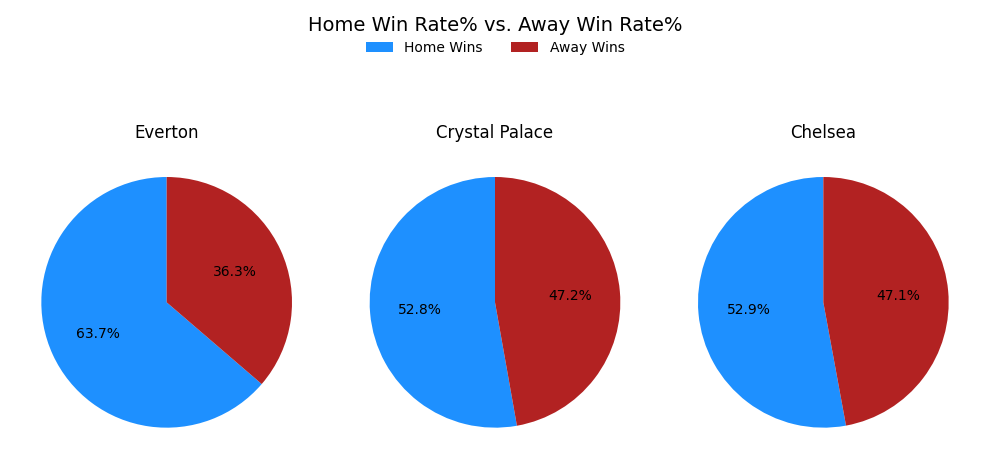

In [1346]:
hwr_team = Highest_HWR["Team"]
hwr_percentages = [Highest_HWR["HomeWin%"], Highest_HWR["AwayWin%"]]
hwr_labels = ["Home Wins", "Away Wins"]

awr_team = Highest_AWR["Team"]
awr_percentages = [Highest_AWR["HomeWin%"], Highest_AWR["AwayWin%"]]
awr_labels = ["Home Wins", "Away Wins"]

awr2_team = Highest_AWR2["Team"]
awr2_percentages = [Highest_AWR2["HomeWin%"], Highest_AWR2["AwayWin%"]]
awr2_labels = ["Home Wins", "Away Wins"]

colours = ["dodgerblue", "firebrick"]

fig, axes = plt.subplots(1, 3, figsize=(10, 6))

axes[0].pie(hwr_percentages, labels=None, autopct="%1.1f%%", colors=colours, startangle=90)
axes[0].set_title(hwr_team)

axes[2].pie(awr2_percentages, labels=None, autopct="%1.1f%%", colors=colours, startangle=90)
axes[2].set_title(awr2_team)

axes[1].pie(awr_percentages, labels=None, autopct="%1.1f%%", colors=colours, startangle=90)
axes[1].set_title(awr_team)


fig.legend(hwr_labels, loc="upper center", bbox_to_anchor=(0.5, 1), ncol=2, frameon=False, title="Home Win Rate% vs. Away Win Rate%", title_fontsize=14)

plt.tight_layout()
plt.show()

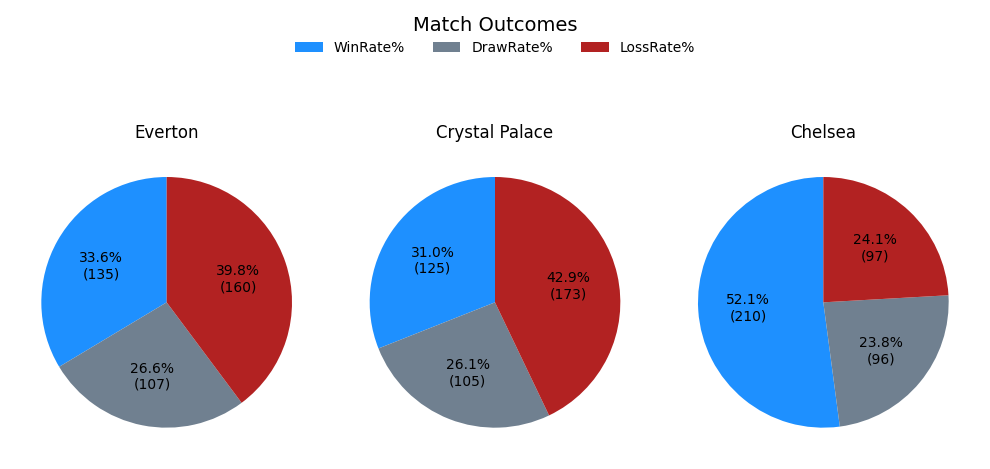

In [1347]:
hwr_team = Highest_HWR["Team"]
awr_team = Highest_AWR["Team"]
awr2_team = Highest_AWR2["Team"]

hwr_win_count = Highest_HWR["Total_Wins"]
hwr_draw_count = Highest_HWR["Draws"]
hwr_loss_count = Highest_HWR["Total_Games"] - (hwr_win_count + hwr_draw_count)

awr_win_count = Highest_AWR["Total_Wins"]
awr_draw_count = Highest_AWR["Draws"]
awr_loss_count = Highest_AWR["Total_Games"] - (awr_win_count + awr_draw_count)

awr2_win_count = Highest_AWR2["Total_Wins"]
awr2_draw_count = Highest_AWR2["Draws"]
awr2_loss_count = Highest_AWR2["Total_Games"] - (awr2_win_count + awr2_draw_count)

hwr_counts = [hwr_win_count, hwr_draw_count, hwr_loss_count]
awr_counts = [awr_win_count, awr_draw_count, awr_loss_count]
awr2_counts = [awr2_win_count, awr2_draw_count, awr2_loss_count]

hwr_percentages = [Highest_HWR["WinRate%"], Highest_HWR["DrawRate%"], Highest_HWR["LossRate%"]]
awr_percentages = [Highest_AWR["WinRate%"], Highest_AWR["DrawRate%"], Highest_AWR["LossRate%"]]
awr2_percentages = [Highest_AWR2["WinRate%"], Highest_AWR2["DrawRate%"], Highest_AWR2["LossRate%"]]

colours = ["dodgerblue", "slategrey", "firebrick"]

def autopct_format(pct, total_counts):
    total = int(round(pct * sum(total_counts) / 100.0))
    return f"{pct:.1f}%\n({total})"

fig, axes = plt.subplots(1, 3, figsize=(10, 6))

axes[0].pie(hwr_percentages, labels=None, autopct=lambda pct: autopct_format(pct, hwr_counts), colors=colours, startangle=90)
axes[0].set_title(hwr_team)

axes[1].pie(awr_percentages, labels=None, autopct=lambda pct: autopct_format(pct, awr_counts), colors=colours, startangle=90)
axes[1].set_title(awr_team)

axes[2].pie(awr2_percentages, labels=None, autopct=lambda pct: autopct_format(pct, awr2_counts), colors=colours, startangle=90)
axes[2].set_title(awr2_team)

fig.legend(["WinRate%", "DrawRate%", "LossRate%"], loc="upper center", bbox_to_anchor=(0.5, 1), ncol=3, frameon=False, title="Match Outcomes", title_fontsize=14)

plt.tight_layout()
plt.show()


In [1348]:
# Home advantage is real and you are more likely to win at Home, but it is not going to help you win at all.
# Everton had a very high Home Win Rate% and Crystal Palace had a high Away Win Rate% but both teams have
# relatively low overall Win Rate%, conversely Chelsea had the same ratio as Crystal Palace but
# performs significantly better overall. None of the top performing teams have a massively disproportionate
# Home Win Rate% vs. Away Win Rate%. Strong teams have to succeed both Home and Away.

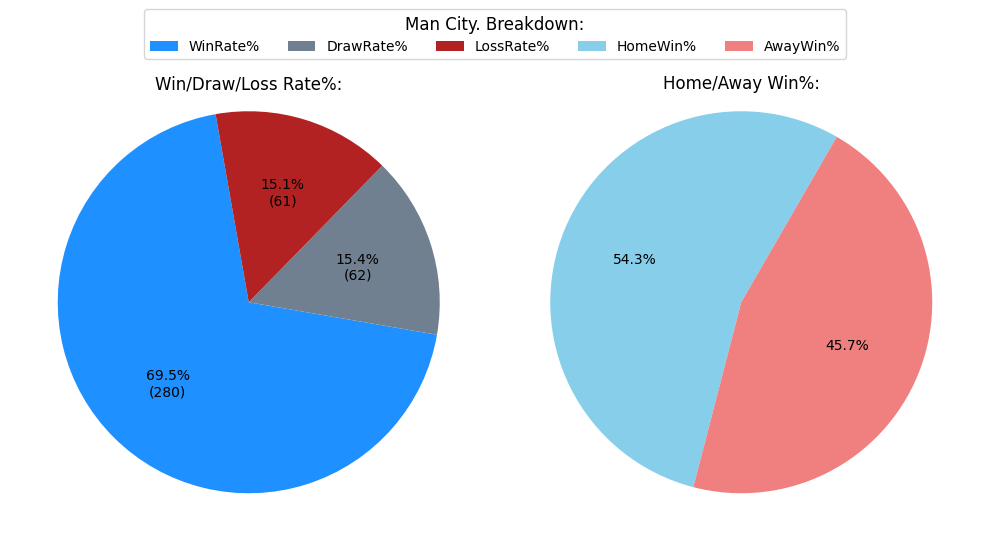

In [1349]:
Man_City = Question_Two_50Wins.iloc[Question_Two_50Wins["WinRate%"].idxmax()]
Man_City
colours = ["dodgerblue", "slategrey", "firebrick"]
colours2 = ["skyblue", "lightcoral"]

team = Man_City["Team"]

win_count = Man_City["Total_Wins"]
draw_count = Man_City["Draws"]
loss_count = Man_City["Total_Games"] - (win_count + draw_count)

team_counts = [win_count, draw_count, loss_count]
match_percentages = [Man_City["WinRate%"], Man_City["DrawRate%"], Man_City["LossRate%"]]
home_away_percentages = [Man_City["HomeWin%"], Man_City["AwayWin%"]]

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].pie(match_percentages, labels=None, autopct=lambda pct: autopct_format(pct, team_counts), colors=colours, startangle=100)
axes[0].set_title("Win/Draw/Loss Rate%:", y=0.93)

axes[1].pie(home_away_percentages, labels=None, autopct="%1.1f%%", colors=colours2, startangle=60)
axes[1].set_title("Home/Away Win%:", y=0.93)


fig.legend(["WinRate%", "DrawRate%", "LossRate%", "HomeWin%", "AwayWin%"], loc="upper center", bbox_to_anchor=(0.5, 1), ncol=5, frameon=True, title="Man City. Breakdown:", title_fontsize=12)

plt.tight_layout()
plt.show()


In [1350]:
# As we can see looking at the team with the highest win rate% overall, Home and Away win rates do not tell of a teams
# ability or performance, only that teams with a high discrepancy between the two often underperform in overall win rate%

In [1351]:
Prem_DF.head()

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2025,Ipswich,Man City,0,6,A,0,3,A,S Barrott,8,17,4,9,4,7,4,7,0,1,0,0
1,2025,Chelsea,Wolves,3,1,H,1,1,D,S Hooper,19,9,7,4,8,14,3,6,4,2,0,0
2,2025,Bournemouth,Nott'm Forest,5,0,H,1,0,H,C Pawson,16,18,10,4,9,12,3,9,2,3,0,0
3,2025,Brighton,Everton,0,1,A,0,1,A,T Robinson,16,3,1,1,8,11,9,1,3,4,0,0
4,2025,Liverpool,Ipswich,4,1,H,3,0,H,M Salisbury,16,3,6,3,10,11,3,4,0,2,0,0


In [1352]:
# Question 3:
# Is there a correlation between the number of shots taken by a team and the number of goals they score? 
# Variables to examine: year, home, away, (team), fthg, ftag, hs, as, hst, ast

In [1353]:
def findTotalShots(year, team):
    totalHomeShots = cycleTeam(year, team)[cycleTeam(year, team)["home"] == team]["hs"].sum()
    totalAwayShots = cycleTeam(year, team)[cycleTeam(year, team)["away"] == team]["as"].sum()
    totalHomeTShots = cycleTeam(year, team)[cycleTeam(year, team)["away"] == team]["hst"].sum()
    totalAwayTShots = cycleTeam(year, team)[cycleTeam(year, team)["away"] == team]["ast"].sum()
    totalShots = totalHomeShots + totalAwayShots
    totalTShots = totalHomeTShots + totalAwayTShots

    return (team, year, int(totalHomeShots), int(totalAwayShots), int(totalHomeTShots), int(totalAwayTShots), int(totalShots), int(totalTShots))

findTotalShots(2016, "Arsenal")

('Arsenal', 2016, 317, 227, 75, 85, 544, 160)

In [1354]:
shots_by_season = []
def findShotCounts():
    for year in years_list:
        for team in teams_list:
            shots_by_season.append(findTotalShots(year, team))
    return shots_by_season

ts_by_year = pd.DataFrame(findShotCounts())
ts_by_year.rename(columns = {0: "Team", 1: "Year", 2: "Total_HS", 3: "Total_AS", 4: "Total_HST", 5: "Total_AST", 6: "Total_Shots", 7: "Total_Shots_onTarget"}, inplace=True)

In [1355]:
ts_by_year

,Team,Year,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
0,Arsenal,2014,176,143,37,42,319,79
1,Aston Villa,2014,91,97,42,31,188,73
2,Bournemouth,2014,0,0,0,0,0,0
3,Brentford,2014,0,0,0,0,0,0
4,Brighton,2014,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
415,Tottenham,2025,28,21,10,8,49,18
416,Watford,2025,0,0,0,0,0,0
417,West Brom,2025,0,0,0,0,0,0
418,West Ham,2025,11,31,11,8,42,19


In [1356]:
combined_df = pd.merge(tg_by_year, ts_by_year, on=["Team", "Year"])
combined_df

,Team,Year,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
0,Arsenal,2014,18,16,34,176,143,37,42,319,79
1,Aston Villa,2014,7,4,11,91,97,42,31,188,73
2,Bournemouth,2014,0,0,0,0,0,0,0,0,0
3,Brentford,2014,0,0,0,0,0,0,0,0,0
4,Brighton,2014,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
415,Tottenham,2025,2,3,5,28,21,10,8,49,18
416,Watford,2025,0,0,0,0,0,0,0,0,0
417,West Brom,2025,0,0,0,0,0,0,0,0,0
418,West Ham,2025,3,2,5,11,31,11,8,42,19


In [1357]:
# Drop rows where all numeric columns (excluding Team and Year) are 0
goals_and_shots_seasonal = combined_df.loc[~(combined_df.iloc[:, 2:].sum(axis=1) == 0)]
goals_and_shots_seasonal.reset_index(drop=True, inplace=True)
goals_and_shots_seasonal

,Team,Year,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
0,Arsenal,2014,18,16,34,176,143,37,42,319,79
1,Aston Villa,2014,7,4,11,91,97,42,31,188,73
2,Burnley,2014,7,7,14,126,90,55,27,216,82
3,Chelsea,2014,22,19,41,169,139,37,48,308,85
4,Crystal Palace,2014,10,10,20,108,94,40,34,202,74
...,...,...,...,...,...,...,...,...,...,...,...
265,Nott'm Forest,2025,4,3,7,20,29,16,7,49,23
266,Southampton,2025,1,3,4,20,23,14,9,43,23
267,Tottenham,2025,2,3,5,28,21,10,8,49,18
268,West Ham,2025,3,2,5,11,31,11,8,42,19


In [1358]:
int(goals_and_shots_seasonal["Total_Goals"].idxmax())
goals_and_shots_seasonal.loc[170]

Team                    Man City
Year                        2021
Total_HG                      60
Total_AG                      53
Total_Goals                  113
Total_HS                     416
Total_AS                     349
Total_HST                     53
Total_AST                    129
Total_Shots                  765
Total_Shots_onTarget         182
Name: 170, dtype: object

In [1359]:
ts_tg_by_decade = []
for team in teams_list:
    ts_tg_by_decade.append({
        "Team": team,
        "Total_HG": int(tg_by_year[tg_by_year["Team"] == team]["Total_HG"].sum()),
        "Total_AG": int(tg_by_year[tg_by_year["Team"] == team]["Total_AG"].sum()),
        "Total_Goals": int(tg_by_year[tg_by_year["Team"] == team]["Total_Goals"].sum()),
        "Total_HS": int(ts_by_year[ts_by_year["Team"] == team]["Total_HS"].sum()),
        "Total_AS": int(ts_by_year[ts_by_year["Team"] == team]["Total_AS"].sum()),
        "Total_HST": int(ts_by_year[ts_by_year["Team"] == team]["Total_HST"].sum()),
        "Total_AST": int(ts_by_year[ts_by_year["Team"] == team]["Total_AST"].sum()),
        "Total_Shots": int(ts_by_year[ts_by_year["Team"] == team]["Total_Shots"].sum()),
        "Total_Shots_onTarget": int(ts_by_year[ts_by_year["Team"] == team]["Total_Shots_onTarget"].sum())
        })

goals_and_shots_decade = pd.DataFrame(ts_tg_by_decade)
goals_and_shots_decade

,Team,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
0,Arsenal,425,330,755,3336,2497,847,870,5833,1717
1,Aston Villa,213,154,367,1876,1575,718,530,3451,1248
2,Bournemouth,200,173,373,1860,1623,781,561,3483,1342
3,Brentford,115,89,204,873,695,404,271,1568,675
4,Brighton,185,167,352,2061,1625,652,572,3686,1224
5,Burnley,155,144,299,1759,1410,861,462,3169,1323
6,Cardiff,21,13,34,230,187,120,58,417,178
7,Chelsea,374,331,705,3320,2738,801,950,6058,1751
8,Crystal Palace,243,234,477,2568,2077,946,708,4645,1654
9,Everton,287,207,494,2649,2164,964,752,4813,1716


In [1360]:
goals_and_shots_decade.sort_values(by="Total_Shots", ascending=False)

,Team,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
18,Man City,539,417,956,3747,3265,610,1186,7012,1796
16,Liverpool,457,371,828,3745,3041,753,1097,6786,1850
7,Chelsea,374,331,705,3320,2738,801,950,6058,1751
0,Arsenal,425,330,755,3336,2497,847,870,5833,1717
30,Tottenham,398,344,742,3227,2600,861,972,5827,1833
19,Man United,359,278,637,3114,2469,897,932,5583,1829
33,West Ham,302,255,557,2633,2277,1069,765,4910,1834
9,Everton,287,207,494,2649,2164,964,752,4813,1716
8,Crystal Palace,243,234,477,2568,2077,946,708,4645,1654
26,Southampton,239,190,429,2420,2128,837,728,4548,1565


In [1361]:
goals_and_shots_seasonal.loc[:, "Accuracy"] = (
    round(goals_and_shots_seasonal["Total_Shots_onTarget"] / goals_and_shots_seasonal["Total_Shots"], 3) * 100
)
goals_and_shots_seasonal

C:\Users\tango\AppData\Local\Temp\ipykernel_1812\2584328826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals_and_shots_seasonal.loc[:, "Accuracy"] = (


,Team,Year,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget,Accuracy
0,Arsenal,2014,18,16,34,176,143,37,42,319,79,24.8
1,Aston Villa,2014,7,4,11,91,97,42,31,188,73,38.8
2,Burnley,2014,7,7,14,126,90,55,27,216,82,38.0
3,Chelsea,2014,22,19,41,169,139,37,48,308,85,27.6
4,Crystal Palace,2014,10,10,20,108,94,40,34,202,74,36.6
...,...,...,...,...,...,...,...,...,...,...,...,...
265,Nott'm Forest,2025,4,3,7,20,29,16,7,49,23,46.9
266,Southampton,2025,1,3,4,20,23,14,9,43,23,53.5
267,Tottenham,2025,2,3,5,28,21,10,8,49,18,36.7
268,West Ham,2025,3,2,5,11,31,11,8,42,19,45.2


In [1362]:
goals_and_shots_decade.loc[:, "Accuracy"] = (
    round(goals_and_shots_decade["Total_Shots_onTarget"] / goals_and_shots_decade["Total_Shots"], 3) * 100
)
goals_and_shots_decade

,Team,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget,Accuracy
0,Arsenal,425,330,755,3336,2497,847,870,5833,1717,29.4
1,Aston Villa,213,154,367,1876,1575,718,530,3451,1248,36.2
2,Bournemouth,200,173,373,1860,1623,781,561,3483,1342,38.5
3,Brentford,115,89,204,873,695,404,271,1568,675,43.0
4,Brighton,185,167,352,2061,1625,652,572,3686,1224,33.2
5,Burnley,155,144,299,1759,1410,861,462,3169,1323,41.7
6,Cardiff,21,13,34,230,187,120,58,417,178,42.7
7,Chelsea,374,331,705,3320,2738,801,950,6058,1751,28.9
8,Crystal Palace,243,234,477,2568,2077,946,708,4645,1654,35.6
9,Everton,287,207,494,2649,2164,964,752,4813,1716,35.7


In [1363]:
goals_and_shots_decade["Accuracy"].idxmax()
goals_and_shots_decade.iloc[13]

Team                    Ipswich
Total_HG                      8
Total_AG                     13
Total_Goals                  21
Total_HS                    130
Total_AS                     78
Total_HST                    67
Total_AST                    32
Total_Shots                 208
Total_Shots_onTarget         99
Accuracy                   47.6
Name: 13, dtype: object

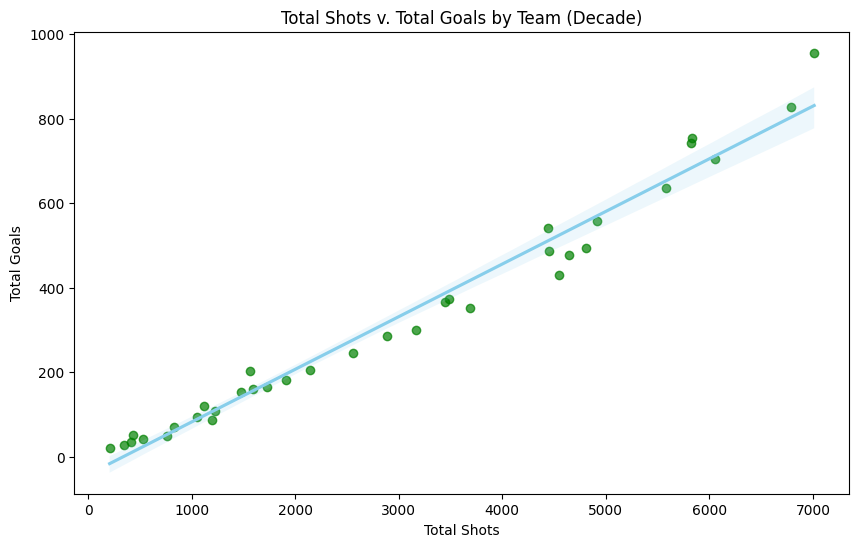

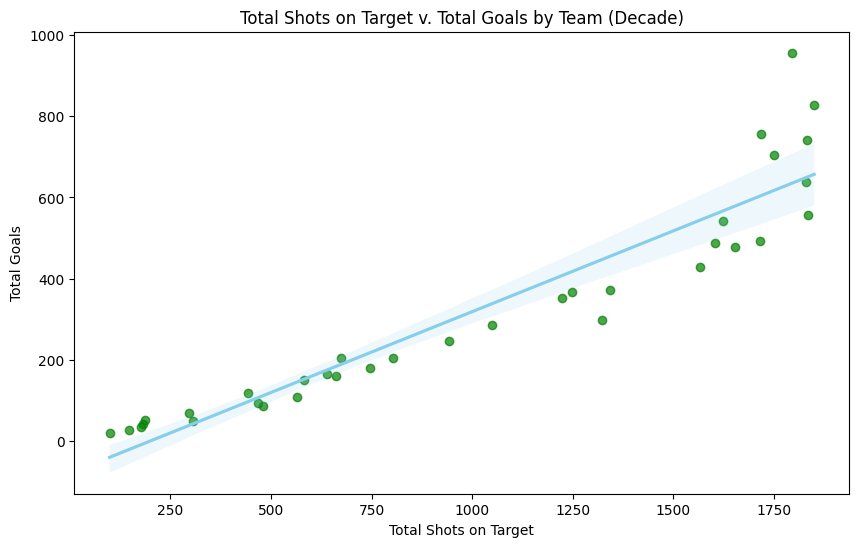

In [1364]:
plt.figure(figsize=(10, 6))
sea.regplot(x="Total_Shots", y="Total_Goals", data=goals_and_shots_decade, scatter_kws={"color": "green", "alpha": 0.7}, line_kws={"color": "skyblue"})

plt.xlabel("Total Shots")
plt.ylabel("Total Goals")
plt.title("Total Shots v. Total Goals by Team (Decade)")

plt.show()

plt.figure(figsize=(10, 6))
sea.regplot(x="Total_Shots_onTarget", y="Total_Goals", data=goals_and_shots_decade, scatter_kws={"color": "green", "alpha": 0.7}, line_kws={"color": "skyblue"})

plt.xlabel("Total Shots on Target")
plt.ylabel("Total Goals")
plt.title("Total Shots on Target v. Total Goals by Team (Decade)")

plt.show()

In [1365]:
# So, rather unsurprisingly the more shots you take the more goals you also get.
# However there appears to be a stronger correlation between just taking shots, rather than ensuring these shots are 'on target'.

In [1368]:
ts_by_year = ts_by_year.loc[~(ts_by_year.iloc[:, 2:].sum(axis=1) == 0)]
ts_by_year.reset_index(drop=True, inplace=True)
ts_by_year

,Team,Year,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
0,Arsenal,2014,176,143,37,42,319,79
1,Aston Villa,2014,91,97,42,31,188,73
2,Burnley,2014,126,90,55,27,216,82
3,Chelsea,2014,169,139,37,48,308,85
4,Crystal Palace,2014,108,94,40,34,202,74
...,...,...,...,...,...,...,...,...
265,Nott'm Forest,2025,20,29,16,7,49,23
266,Southampton,2025,20,23,14,9,43,23
267,Tottenham,2025,28,21,10,8,49,18
268,West Ham,2025,11,31,11,8,42,19


In [1385]:
ts_by_year_1424 = ts_by_year[ts_by_year["Year"] < 2025]
ts_by_year_1424

,Team,Year,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
0,Arsenal,2014,176,143,37,42,319,79
1,Aston Villa,2014,91,97,42,31,188,73
2,Burnley,2014,126,90,55,27,216,82
3,Chelsea,2014,169,139,37,48,308,85
4,Crystal Palace,2014,108,94,40,34,202,74
...,...,...,...,...,...,...,...,...
245,Sheffield United,2024,101,95,63,36,196,99
246,Southampton,2024,85,94,57,23,179,80
247,Tottenham,2024,292,255,80,99,547,179
248,West Ham,2024,267,242,124,65,509,189


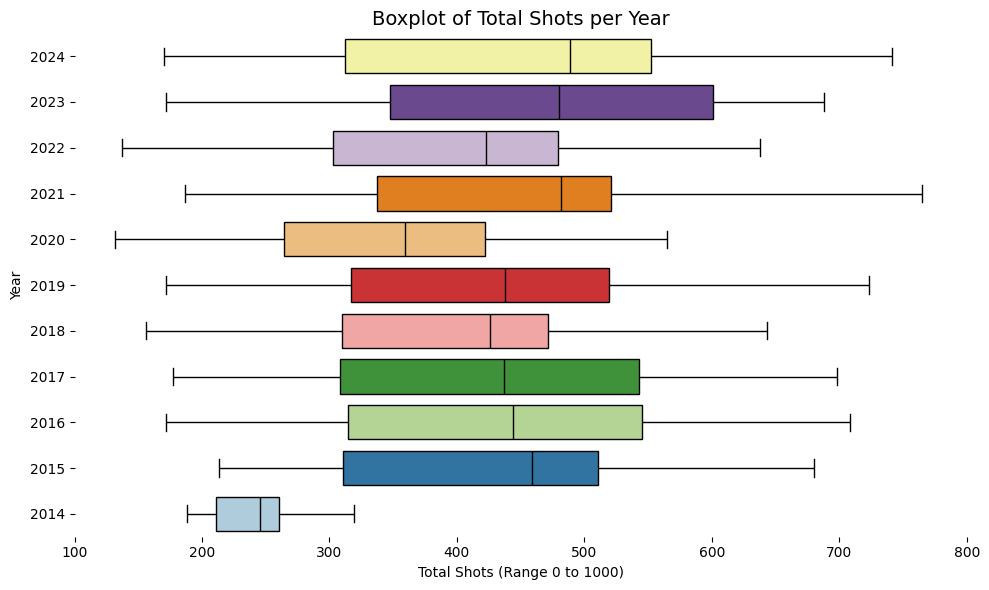

In [1426]:
plt.figure(figsize=(10, 6))

sea.boxplot(
    data=ts_by_year_1424,
    y="Year",
    x="Total_Shots",
    hue="Year",
    palette="Paired",
    orient='h',
    width=0.75,
    fliersize=1,
    linewidth=1,
    linecolor="black",
    legend=False
)

plt.xticks(range(100, 900, 100))
plt.grid(False)
sea.despine(left=True, bottom=True)

plt.xlabel('Total Shots (Range 0 to 1000)', fontsize=10)
plt.ylabel('Year', fontsize=10)
plt.title('Boxplot of Total Shots per Year', fontsize=14)

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()